# Analysis of studio recordings and live performances of songs
#### This notebook contains code to analyze a dataset with musical features of songs, as provided by the spotify API. It also contains labels as to whether a song is recorded at a studio or it is a live performance.

### Let's import the required libraries

In [5]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [27]:
# Load the combined CSV file into a Pandas dataframe
df = pd.read_csv('songs.csv')

### Exploring the data

In [7]:
df.head(10)

,id,energy,danceability,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,label
0,7xHATAMD7ezTZGYsNAMr5R,0.781,0.379,0,-6.147,0,0.0417,0.315000,0.000162,0.401,0.327,77.567,147840,4,live
1,69daVl60U0WWueFAUSQFih,0.875,0.612,9,-6.981,1,0.0546,0.341000,0.006200,0.951,0.413,150.093,185387,4,live
2,4gzSuZQoKUG3ztXErLlc0K,0.925,0.574,6,-5.955,0,0.0386,0.001080,0.004080,0.973,0.780,138.845,223707,4,live
3,0qYNU0d6q2797FZwc4HXoJ,0.907,0.463,1,-6.732,0,0.0889,0.065000,0.000059,0.768,0.593,165.427,267373,4,live
4,7ajzjngqdDOXNaxP2GHz4C,0.911,0.599,6,-5.715,0,0.0367,0.005530,0.004390,0.561,0.382,121.911,252973,4,live
5,05ngn5qJ42mN6HEtrxuhI7,0.965,0.567,9,-5.460,0,0.0515,0.040700,0.000005,0.974,0.489,129.006,293347,4,live
6,4unD2O56RtWAMLuZLWTWbr,0.993,0.163,3,-3.600,1,0.1420,0.000158,0.086800,0.722,0.160,175.122,178107,4,live
7,19dqbkqEgpgUZsh7FXftIs,0.951,0.644,7,-9.867,1,0.0406,0.108000,0.017200,0.657,0.971,128.091,241360,4,live
8,1DJfcWfj5dSIzksFpnRr3S,0.967,0.562,9,-4.919,0,0.2710,0.049600,0.000074,0.953,0.268,99.130,323733,4,live
9,5s457o0GLooprDJNitW5WF,0.967,0.352,1,-4.811,1,0.1540,0.000089,0.000000,0.547,0.127,144.717,233440,4,live


### Shuffle the data

In [28]:
df = df.sample(frac=1, random_state=7)
df.head(10)

,id,energy,danceability,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,label
1683,47EiZGikw0Gcyrsraz87uu,0.890,0.255,2,-7.297,1,0.0383,0.28000,0.556000,0.9570,0.433,100.386,965293,4,live
3313,4l8hbpGBFlNtWF4bTGzauc,0.694,0.761,0,-4.704,1,0.0565,0.00703,0.000011,0.1170,0.449,108.977,369320,4,studio
4660,4jBfUB4kQJCWOrjGLQqhO0,0.510,0.682,6,-9.987,0,0.0441,0.14300,0.000004,0.0797,0.191,120.097,314110,4,studio
1015,4deoTh7uJjxuANwK3pGGVL,0.830,0.553,10,-5.257,1,0.0571,0.05040,0.003290,0.6510,0.746,129.441,232440,4,live
2994,6e8Ou0wiqAzIpWb2eSxll8,0.534,0.877,1,-6.178,1,0.1500,0.03390,0.000017,0.0441,0.890,108.170,197560,4,studio
2896,1lB6TCFlx4f50wdetOuGcT,0.397,0.642,6,-16.842,1,0.0639,0.46100,0.000834,0.1060,0.798,84.064,286493,4,studio
3714,676Rf0qIOh2gKNEl9TnCOx,0.737,0.590,7,-5.867,1,0.0384,0.40400,0.000000,0.1080,0.877,132.966,164160,4,studio
3672,4JehYebiI9JE8sR8MisGVb,0.720,0.508,11,-5.908,0,0.0628,0.27200,0.000000,0.0563,0.472,79.983,261640,4,studio
4546,0e3aRkhcCdkYN62p2PFfD3,0.647,0.643,0,-9.061,1,0.0795,0.36900,0.000000,0.3340,0.632,76.948,185480,4,studio
873,2hr3mbawptb25db2nbnjUZ,0.870,0.280,1,-9.448,0,0.0473,0.00123,0.002230,0.8970,0.489,157.121,312667,4,live


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4705 entries, 2010 to 1767
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                4705 non-null   object 
 1   energy            4705 non-null   float64
 2   danceability      4705 non-null   float64
 3   key               4705 non-null   int64  
 4   loudness          4705 non-null   float64
 5   mode              4705 non-null   int64  
 6   speechiness       4705 non-null   float64
 7   acousticness      4705 non-null   float64
 8   instrumentalness  4705 non-null   float64
 9   liveness          4705 non-null   float64
 10  valence           4705 non-null   float64
 11  tempo             4705 non-null   float64
 12  duration_ms       4705 non-null   int64  
 13  time_signature    4705 non-null   int64  
 14  label             4705 non-null   object 
dtypes: float64(9), int64(4), object(2)
memory usage: 588.1+ KB


### Drop duplicates

In [29]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4643 entries, 1683 to 4271
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                4643 non-null   object 
 1   energy            4643 non-null   float64
 2   danceability      4643 non-null   float64
 3   key               4643 non-null   int64  
 4   loudness          4643 non-null   float64
 5   mode              4643 non-null   int64  
 6   speechiness       4643 non-null   float64
 7   acousticness      4643 non-null   float64
 8   instrumentalness  4643 non-null   float64
 9   liveness          4643 non-null   float64
 10  valence           4643 non-null   float64
 11  tempo             4643 non-null   float64
 12  duration_ms       4643 non-null   int64  
 13  time_signature    4643 non-null   int64  
 14  label             4643 non-null   object 
dtypes: float64(9), int64(4), object(2)
memory usage: 580.4+ KB


### What is the distribution of the labels?

In [30]:
# Count the number of samples in each class
class_counts = df['label'].value_counts()

# Print the number of samples in each class
print(class_counts)


label
live      2348
studio    2295
Name: count, dtype: int64


### From the spotify documentation: "A value above 0.8 provides strong likelihood that the track is live."
##### But as we can see below, 22.18% of the songs labeled as 'live', have a value below 0.8 in liveness

In [31]:
total_rows = len(df)
count = len(df[(df['label'] == 'live') & (df['liveness'] < 0.8)])
percentage = (count / total_rows) * 100
print(f"The percentage of rows with label 'live' and liveness < 0.8: {percentage:.2f}%")

The percentage of rows with label 'live' and liveness < 0.8: 22.18%


### Preprocessing

In [32]:
# Drop the columns 'id', 'key', 'mode' and 'signature' as well, because they are irrelevant to this analysis
df = df.drop(['id','mode', 'key', 'time_signature'] , axis=1)
# Select the numerical columns that need to be scaled
num_cols = ['energy', 'danceability', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

# Perform standardization on the selected columns
scaler = StandardScaler()
# scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Map the labels to integer values
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

# Create a dictionary mapping integer values to their corresponding labels
label_map = {i: label_encoder.inverse_transform([i])[0] for i in range(len(label_encoder.classes_))}

df.head(10)

,energy,danceability,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,label
1683,0.736455,-1.614814,-0.049778,-0.598711,0.498288,3.099312,1.370066,-0.386097,-0.897809,6.926725,0
3313,-0.339496,1.243548,0.790355,-0.366185,-0.703803,-0.336323,-1.018773,-0.318098,-0.577098,1.102712,1
4660,-1.349574,0.797282,-0.921339,-0.524609,-0.105025,-0.336364,-1.124849,-1.414590,-0.161977,0.563185,1
1015,0.407082,0.068569,0.611183,-0.358519,-0.512813,-0.316062,0.499846,0.944143,0.186844,-0.234917,0
2994,-1.217825,1.898825,0.312778,0.828388,-0.585474,-0.336289,-1.226090,1.556138,-0.607224,-0.575774,1
2896,-1.969893,0.571324,-3.142362,-0.271641,1.295367,-0.331238,-1.050055,1.165141,-1.507126,0.293304,1
3714,-0.103446,0.277580,0.413542,-0.597434,1.044353,-0.336392,-1.044368,1.500888,0.318435,-0.902168,1
3672,-0.196768,-0.185633,0.400258,-0.285695,0.463058,-0.336392,-1.191395,-0.220349,-1.659473,0.050433,1
4546,-0.597505,0.576973,-0.621315,-0.072333,0.890222,-0.336392,-0.401656,0.459646,-1.772773,-0.693823,1
873,0.626664,-1.473591,-0.746703,-0.483726,-0.729345,-0.322612,1.199435,-0.148099,1.220166,0.549083,0


In [33]:
label_map

{0: 'live', 1: 'studio'}

### Visualizing the data

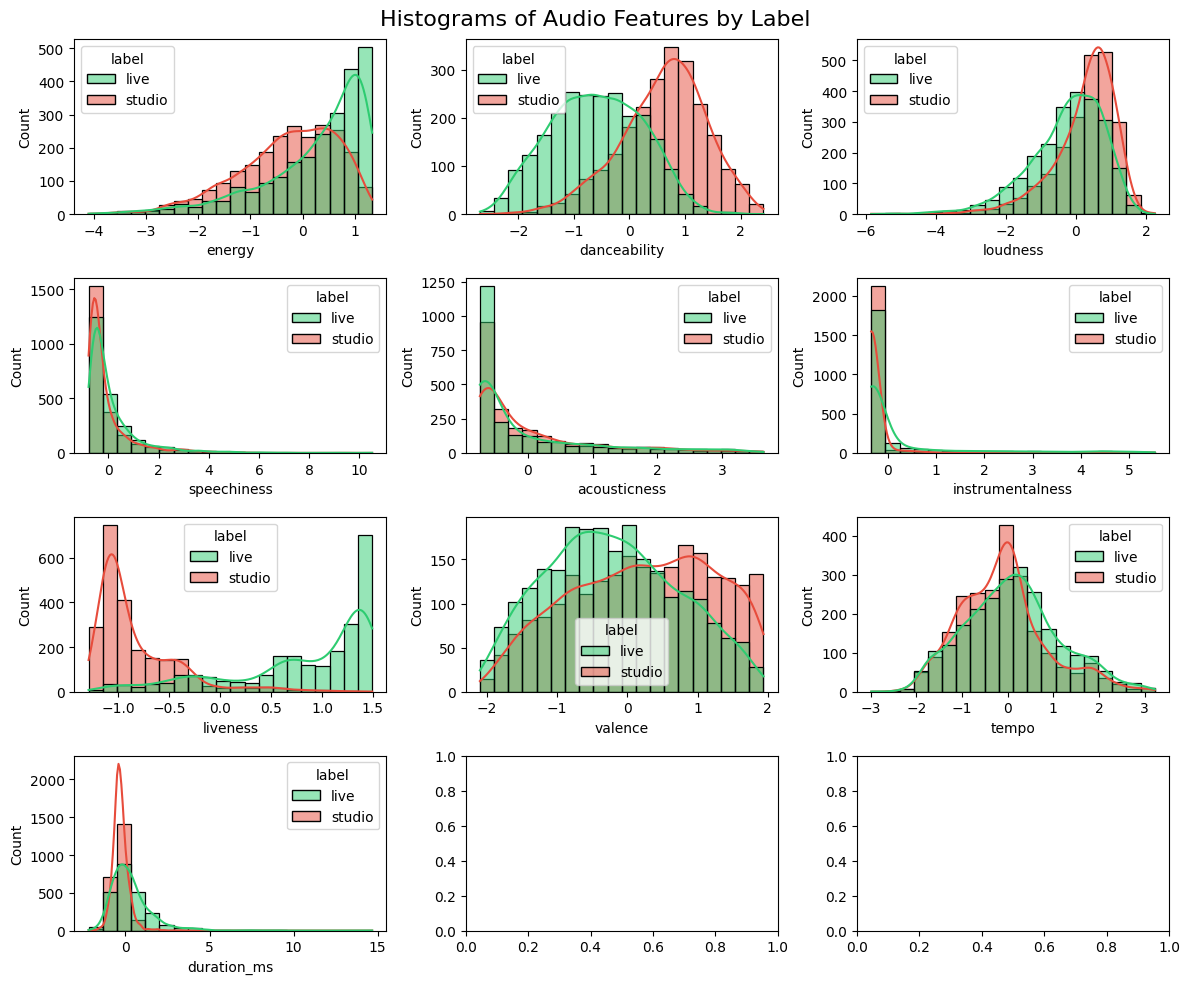

In [34]:
# Define the color palette
colors = ['#2ecc71', '#e74c3c']

nrows = 4
ncols = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 10))
for i, feature in enumerate(df.columns[:-1]):
    row, col = i // 3, i % 3
    if row < nrows and col < ncols:
        ax = axes[row, col]
        sns.histplot(data=df, x=feature, hue=df['label'].map(label_map), ax=ax, kde=True, bins=20, palette=colors)
        ax.set_xlabel(feature)
        


# Add a title to the figure
fig.suptitle("Histograms of Audio Features by Label", fontsize=16)

# Adjust the spacing between the subplots
plt.tight_layout()

# Show the figure
plt.show()

### tSNE vs PCA (2d)

In [35]:
tsne = TSNE(n_components=2, random_state=7)
pca = PCA(n_components=2, random_state=7)

data_tsne = tsne.fit_transform(df)
data_pca = pca.fit_transform(df)

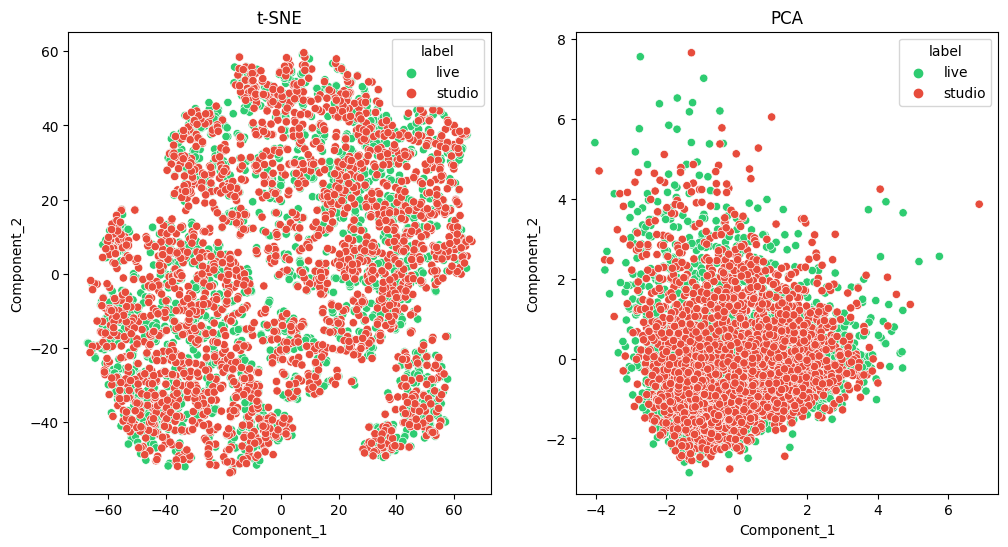

In [36]:
data_tsne_df = pd.DataFrame(data_tsne, columns=['Component_1', 'Component_2'])
data_pca_df = pd.DataFrame(data_pca, columns=['Component_1', 'Component_2'])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.scatterplot(data=data_tsne_df, x="Component_1", y="Component_2", hue=df['label'].map(label_map), ax=axes[0], palette=colors)

axes[0].set_title("t-SNE")

sns.scatterplot(data=data_pca_df, x="Component_1", y="Component_2", hue=df['label'].map(label_map), ax=axes[1], palette=colors)

axes[1].set_title("PCA")

plt.show()

### tSNE vs PCA (3d)

In [37]:
tsne = TSNE(n_components=3, random_state=7)
pca = PCA(n_components=3, random_state=7)

data_tsne = tsne.fit_transform(df)
data_pca = pca.fit_transform(df)

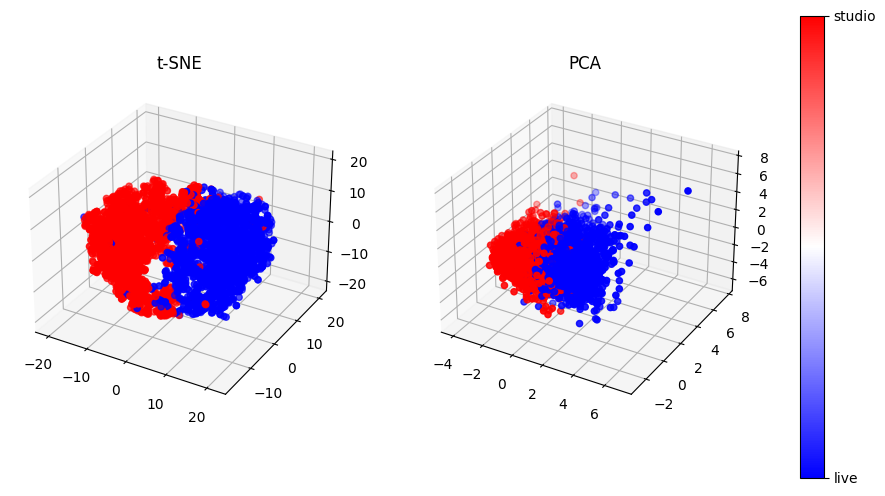

In [38]:
data_tsne_df = pd.DataFrame(data_tsne, columns=['Component_1', 'Component_2', 'Component_3'])
data_pca_df = pd.DataFrame(data_pca, columns=['Component_1', 'Component_2', 'Component_3'])

fig = plt.figure(figsize=(12, 6))
ax_tsne = fig.add_subplot(121, projection='3d')
ax_pca = fig.add_subplot(122, projection='3d')

scatter_tsne = ax_tsne.scatter(data_tsne_df['Component_1'], data_tsne_df['Component_2'], data_tsne_df['Component_3'], c=df['label'], cmap='bwr')
scatter_pca = ax_pca.scatter(data_pca_df['Component_1'], data_pca_df['Component_2'], data_pca_df['Component_3'], c=df['label'], cmap='bwr')

ax_tsne.set_title("t-SNE")
ax_pca.set_title("PCA")

# Add a colorbar for better understanding of the labels
cbar = fig.colorbar(scatter_tsne, ax=[ax_tsne, ax_pca])
cbar.set_ticks(np.arange(len(label_encoder.classes_)))
cbar.set_ticklabels(list(label_encoder.classes_))

plt.show()

In [41]:
# Split the dataframe into a feature matrix (X) and a target vector (y)
X = df.drop('label', axis=1)
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of classifiers to train and evaluate
classifiers = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('SVM', SVC(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('KNN', KNeighborsClassifier())
]

# Train and evaluate each classifier
for name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, )
    recall = recall_score(y_test, y_pred, )
    f1 = f1_score(y_test, y_pred,)
    
    print(f'{name}:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 score: {f1:.4f}')

    print()

Random Forest:
Accuracy: 0.9386
Precision: 0.9296
Recall: 0.9478
F1 score: 0.9386

SVM:
Accuracy: 0.9365
Precision: 0.9221
Recall: 0.9522
F1 score: 0.9369

Logistic Regression:
Accuracy: 0.9376
Precision: 0.9205
Recall: 0.9565
F1 score: 0.9382

KNN:
Accuracy: 0.9311
Precision: 0.9024
Recall: 0.9652
F1 score: 0.9328



cross-validation and hyperparameter tuning! 